<a href="https://colab.research.google.com/github/adamehayman/AMII/blob/main/7_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Selection**
The process of feature selection involves reducing the dimension of the input space by selecting a relevant subset of the input features with the goal of:  
*  reducing model size and complexity to improve interpretability  
*  increase computation speed and simplify feature engineering pipelines  
*  reduce overfitting and improve generalization by removing noisy features
We want to remove the redundant or irrelevant features that do not contribute a lot of insight while maintaining data variance.
There are several feature selection methods out there, including:  
*  filter methods
*  wrapper methods
*  embedded methods  
We will be using a combination of Boruta, which is a wrapper built around the random forest model and SHAP. The Boruta algorithm adds noise to our data by creating random permutations of the original features. The algorithm then fits a random forest to the noisy data and uses a feature importance ranking to decide whether a feature should be kept.

In [45]:
import numpy as np # for numeric computation
import pandas as pd # for handling data in table format
pd.set_option('display.max_rows', 200)
import requests # for retrieving web addresses
import io # for storing data
import plotly.express as px # for visualization
import math
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.style.use('ggplot')

In [46]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from numpy import mean
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [47]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ClassPredictionError

In [4]:
# Clone Git Repo
!git clone -l -s git://github.com/adamehayman/AMII.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 93, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 256 (delta 52), reused 63 (delta 25), pack-reused 163
Receiving objects: 100% (256/256), 66.62 MiB | 25.53 MiB/s, done.
Resolving deltas: 100% (140/140), done.
/content/cloned-repo
1_NASA_FD001_EDA.ipynb			   6_Class_Models_Stacking.ipynb
2_10_Class_Decision_Tree_Classifier.ipynb  Classification_Report.pdf
3_5_Class_Decision_Tree_Classifier.ipynb   FIgures.pptx
4_RandomForest.ipynb			   NASA_TurboFan_Data
5_XGBoost.ipynb				   README.md


In [5]:
X_train = pd.read_csv('/content/cloned-repo/NASA_TurboFan_Data/FD001/Classification_Data/ADASYN_Balanced/X_train_scaled.csv')
y_train = pd.read_csv('/content/cloned-repo/NASA_TurboFan_Data/FD001/Classification_Data/ADASYN_Balanced/y_train.csv')

X_val = pd.read_csv('/content/cloned-repo/NASA_TurboFan_Data/FD001/Classification_Data/ADASYN_Balanced/X_val_scaled.csv')
y_val = pd.read_csv('/content/cloned-repo/NASA_TurboFan_Data/FD001/Classification_Data/ADASYN_Balanced/y_val.csv')

X_test = pd.read_csv('/content/cloned-repo/NASA_TurboFan_Data/FD001/Classification_Data/ADASYN_Balanced/X_test_scaled.csv')
y_test = pd.read_csv('/content/cloned-repo/NASA_TurboFan_Data/FD001/Classification_Data/ADASYN_Balanced/y_test.csv')

In [6]:
sensors = ['T24', 'T30', 'T50', 'P30', 'Ps30', 'phi', 'NRf', 'BPR', 'htBleed', 'w31', 'w32']

## **Import Models**

In [7]:
import joblib

In [8]:
xgb2 = joblib.load('/content/cloned-repo/NASA_TurboFan_Data/FD001/Models/5_class_XGBoost_Final_Model')
DTCbal = joblib.load('/content/cloned-repo/NASA_TurboFan_Data/FD001/Models/5_class_tree_balanced')
RndFor = joblib.load('/content/cloned-repo/NASA_TurboFan_Data/FD001/Models/5_class_randomforest')

## **Feature Importance**

In [9]:
pip install shap

     |████████████████████████████████| 358kB 5.0MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490494 sha256=07d6dcaf0da3da8d19fc8f35032026ec078f0e7413cb2c3e85dd7decad672f11
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [10]:
import shap

### **Decision Tree**

In [11]:
explainer = shap.TreeExplainer(DTCbal)
shap_values = explainer.shap_values(X_train)

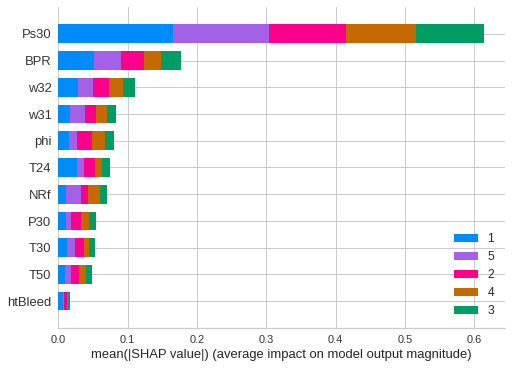

In [12]:
shap.summary_plot(shap_values, X_train, class_names=DTCbal.classes_)

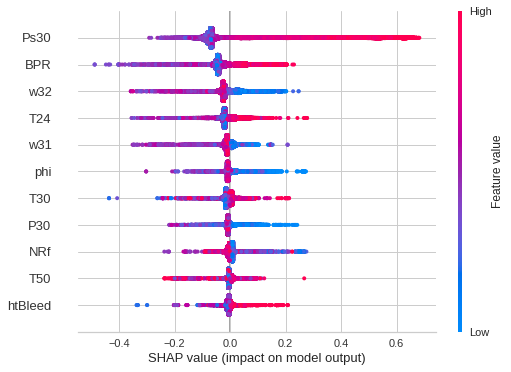

In [13]:
# Class 1 Feature Importance
shap.summary_plot(shap_values[0], X_train, class_names=DTCbal.classes_)

### **Random Forest**

In [14]:
explainer = shap.TreeExplainer(RndFor)
shap_values = explainer.shap_values(X_train)

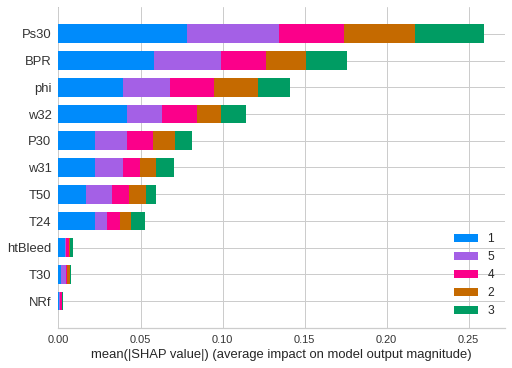

In [15]:
shap.summary_plot(shap_values, X_train, class_names=RndFor.classes_)

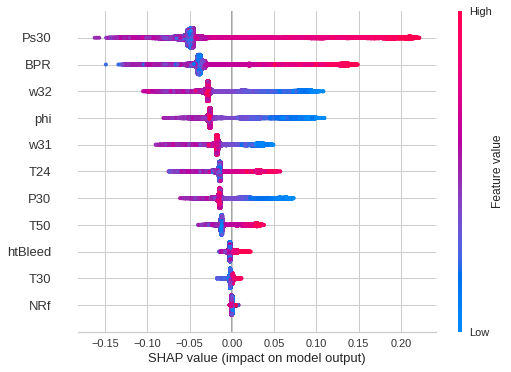

In [16]:
# Class 1 Feature Importance
shap.summary_plot(shap_values[0], X_train, class_names=RndFor.classes_)

### **XGBoost**

In [17]:
explainer = shap.TreeExplainer(xgb2)
shap_values = explainer.shap_values(X_train)

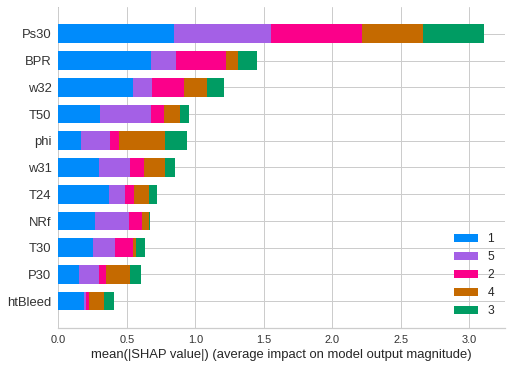

In [18]:
shap.summary_plot(shap_values, X_train, class_names=xgb2.classes_)

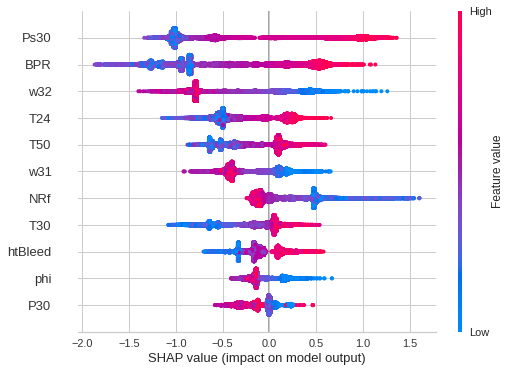

In [19]:
# Class 1 Feature Importance
shap.summary_plot(shap_values[0], X_train, class_names=xgb2.classes_)

## **Results**
When we look at feature importance across all the classes, the top 5 features are:  
1.  Ps30
2.  BPR
3.  w32
4.  T50
5.  phi

But, when we look at which features are most important for predicting our class of interest, Class 1, the top 5 features are:
1.  Ps30
2.  BPR
3.  w32
4.  T24
5.  T50

Both T24 and T50 are more important for predicting Class 1. When we look back at our correlation to RUL, we see that 4 of the 5 most important classes for predicting Class 1 have the strongest negative correlation. Only w32 has a strong positive correlation with predicting Class 1.

## **Retrain Models with top 5 Features**

### **New DataFrames with top 5 Class 1 Features**

In [20]:
X_train_top5 = X_train[['Ps30', 'BPR', 'w32', 'T24', 'T50']]
X_val_top5 = X_val[['Ps30', 'BPR', 'w32', 'T24', 'T50']]
X_test_top5 = X_test[['Ps30', 'BPR', 'w32', 'T24', 'T50']]

### **Balanced Tree**

In [21]:
DTCbal5 = DTCbal
DTCbal5.fit(X_train_top5, y_train)

AttributeError: ignored

**Validation Set**

In [ ]:
viz = ClassificationReport((DTCbal5), per_class=True, support=True)
viz.fit(X_train_top5, y_train)
viz.score(X_val_top5, y_val)
g = viz.poof()

**Test Set**

In [ ]:
viz = ClassificationReport((DTCbal5), per_class=True, support=True)
viz.fit(X_train_top5, y_train)
viz.score(X_test_top5, y_test)
g = viz.poof()

### **Random Forest**

In [22]:
RndFor5 = RndFor
RndFor5.fit(X_train_top5, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**Validation Set**

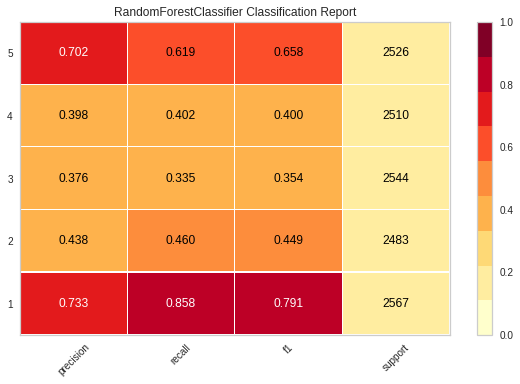

In [23]:
viz = ClassificationReport((RndFor5), per_class=True, support=True)
viz.fit(X_train_top5, y_train)
viz.score(X_val_top5, y_val)
g = viz.poof()

**Test Set**

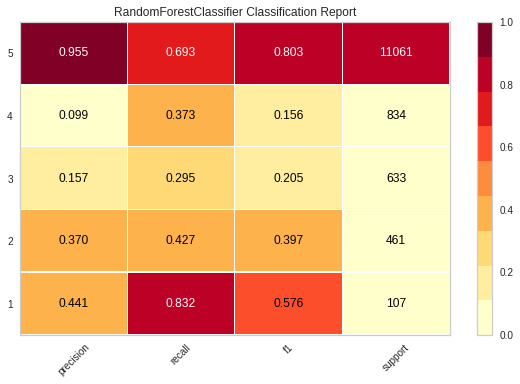

In [24]:
viz = ClassificationReport((RndFor5), per_class=True, support=True)
viz.fit(X_train_top5, y_train)
viz.score(X_test_top5, y_test)
g = viz.poof()

### **XGBoost**

In [25]:
xgb5 = xgb2
xgb5.fit(X_train_top5, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='merror',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=100, n_jobs=1,
              nthread=None, num_class=6, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
              seed=42, silent=None, subsample=1, tree_method='hist',
              verbosity=1)

**Validation Set**

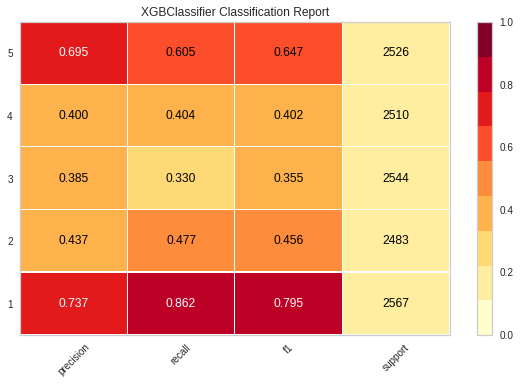

In [26]:
viz = ClassificationReport((xgb5), per_class=True, support=True)
viz.fit(X_train_top5, y_train)
viz.score(X_val_top5, y_val)
g = viz.poof()

**Test Set**

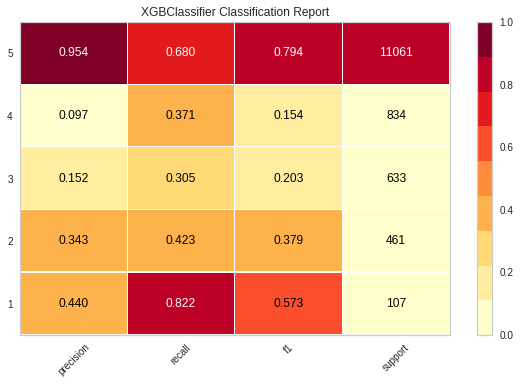

In [27]:
viz = ClassificationReport((xgb5), per_class=True, support=True)
viz.fit(X_train_top5, y_train)
viz.score(X_test_top5, y_test)
g = viz.poof()

## **Summary**  

Keeping the top 5 features for Class 1 predictions reduced our model recall.

# **Feature Engineering**

## **Sensor Smoothing**  
  
If we look back at the sensor plot we can see a lot of variation that could be from vibrations or noise. This variation could be causing some problems for our model so we will apply exponential smoothing.

In [50]:
train1_class = pd.read_csv('/content/cloned-repo/NASA_TurboFan_Data/FD001/train1_new.csv')

In [51]:
train1_class_columns = ['T24', 'T30', 'T50', 'P15', 'P30', 'Ps30', 'phi', 'NRf', 'NRc','BPR', 'htBleed', 'w31', 'w32']

In [30]:
train1_class

,Unit,T24,T30,T50,P15,P30,Ps30,phi,NRf,NRc,BPR,htBleed,w31,w32,RUL
0,1,641.82,1589.70,1400.60,21.61,554.36,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,642.15,1591.82,1403.14,21.61,553.75,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,642.35,1587.99,1404.20,21.61,554.26,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,642.35,1582.79,1401.87,21.61,554.45,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,642.37,1582.85,1406.22,21.61,554.00,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,643.49,1597.98,1428.63,21.61,551.43,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,643.54,1604.50,1433.58,21.61,550.86,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,643.42,1602.46,1428.18,21.61,550.94,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,643.23,1605.26,1426.53,21.61,550.68,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [52]:
# Strongest Negative Correlation from previous EDA notebook

str_corr = ['Ps30', 'T50']

In [53]:
# Function to plot every 10th unit

def plot_sensor(sensor_name):
    plt.figure(figsize=(20,5))
    for i in train1_class['Unit'].unique():
        if (i % 10 == 0):  # only plot every 10th unit_nr
            plt.plot('RUL', sensor_name, 
                     data=train1_class[train1_class['Unit']==i])
    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 275, 25))
    plt.ylabel(sensor_name)
    plt.xlabel('Remaining Use fulLife')
    plt.show()

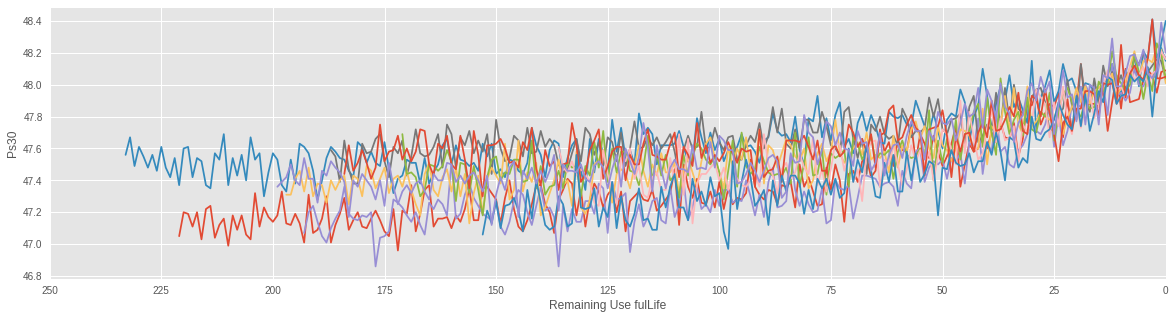

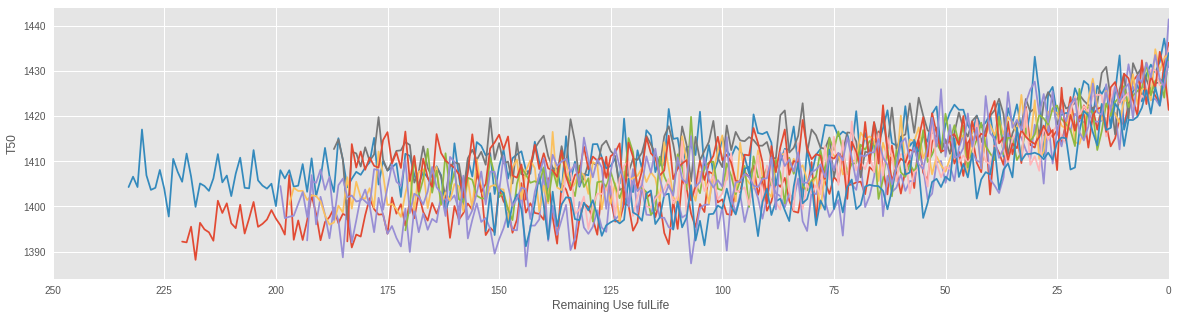

In [54]:
for sensor_name in str_corr:
    plot_sensor(sensor_name)

In [55]:
def smooth(df, sensors, n_samples):
    # first, take the rolling mean for
    df[sensors] = df.groupby('Unit')[sensors].rolling(n_samples).mean().reset_index(drop=True)
    
    # second, drop introduced Na's
    def create_mask(data, samples):
        result = np.ones_like(data)
        result[0:samples+1] = 0
        return result
    
    mask = df.groupby('Unit')['Unit'].transform(create_mask, samples=n_samples).astype(bool)
    df = df[mask]

    return df

In [56]:
train1_smooth = smooth(train1_class, train1_class_columns, n_samples=6)


In [57]:
# Strongest Negative Correlation from previous EDA notebook

str_corr = ['Ps30', 'T50']

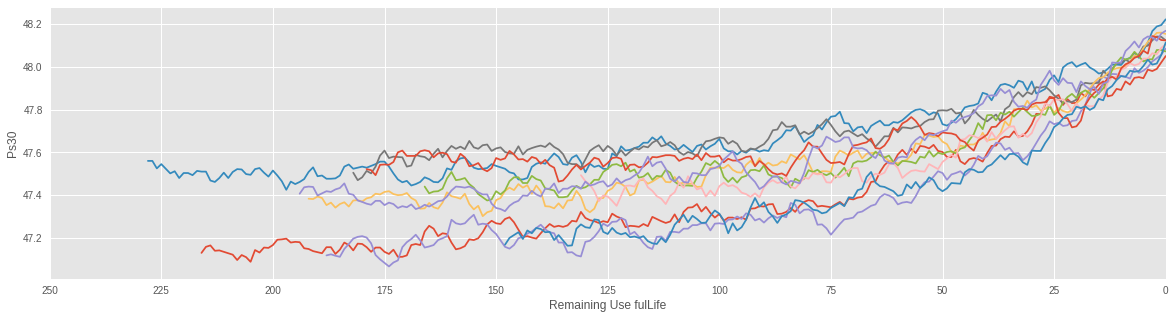

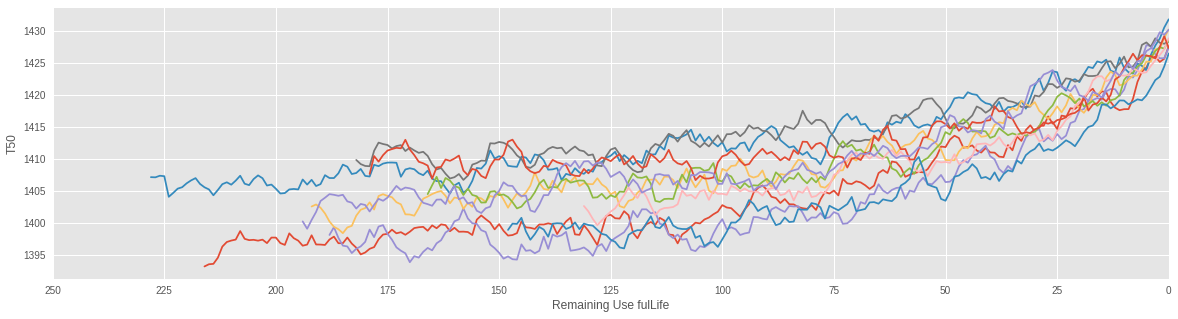

In [58]:
for sensor_name in str_corr:
    plot_sensor(sensor_name)